In [73]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier

In [74]:
credit_df = pd.read_csv("default of credit card clients.csv")
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [75]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [76]:
credit_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [77]:
credit_df.drop_duplicates(inplace=True)

In [78]:
credit_df.drop(columns=['ID'], inplace=True)

In [79]:
credit_df = credit_df[credit_df["EDUCATION"] > 0]
credit_df = credit_df[credit_df["MARRIAGE"] > 0]
credit_df = credit_df[credit_df["PAY_1"] != -2]
credit_df = credit_df[credit_df["PAY_2"] != -2]
credit_df = credit_df[credit_df["PAY_3"] != -2]
credit_df = credit_df[credit_df["PAY_4"] != -2]
credit_df = credit_df[credit_df["PAY_5"] != -2]
credit_df = credit_df[credit_df["PAY_6"] != -2]

In [80]:
credit_df.skew(numeric_only=True)

LIMIT_BAL     1.142362
SEX          -0.375018
EDUCATION     0.903241
MARRIAGE     -0.002689
AGE           0.744786
PAY_1         1.632391
PAY_2         1.486875
PAY_3         1.649479
PAY_4         2.067816
PAY_5         2.262348
PAY_6         2.114155
BILL_AMT1     2.438907
BILL_AMT2     2.477722
BILL_AMT3     2.475608
BILL_AMT4     2.576928
BILL_AMT5     2.640086
BILL_AMT6     2.604396
PAY_AMT1     15.447839
PAY_AMT2     24.711461
PAY_AMT3     18.281115
PAY_AMT4     14.004952
PAY_AMT5     11.321081
PAY_AMT6     11.251552
dpnm          1.282791
dtype: float64

In [81]:
# Checking outliers using IQR method
def extreme_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Defining bounds for outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
    return outliers

In [82]:
selected_columns = credit_df[["LIMIT_BAL"]]
for col in selected_columns:
    out = extreme_outliers(credit_df, col)
    if len(out)>0:
        print("Extreme outliers found in",col,"and the count is",len(out))
    else:
        print("No extreme outliers found in", col)

Extreme outliers found in LIMIT_BAL and the count is 8


In [83]:
credit_df.drop(out.index, inplace = True)

In [84]:
credit_df.shape

(23385, 24)

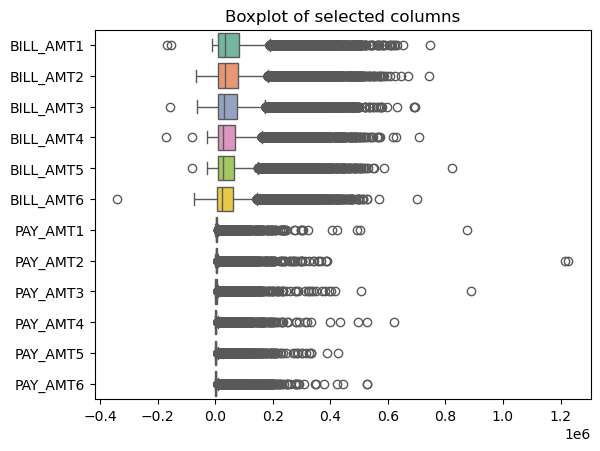

In [85]:
selected_columns = credit_df[["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6","PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
sns.boxplot(data=selected_columns, orient="h", palette="Set2")
plt.title("Boxplot of selected columns")
plt.show()    

In [86]:
from scipy.stats import mstats
for col in selected_columns:
    credit_df[col] = mstats.winsorize(credit_df[col], limits=[0.05, 0.05])  #capping the 5th and 95th percentile values

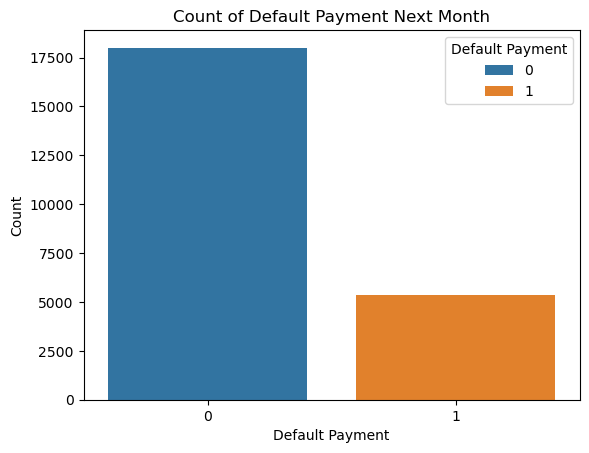

In [87]:
sns.countplot(x='dpnm', data=credit_df, hue='dpnm')
plt.title('Count of Default Payment Next Month')
plt.xlabel('Default Payment')
plt.ylabel('Count')
plt.legend(title='Default Payment', loc='upper right')
plt.show()

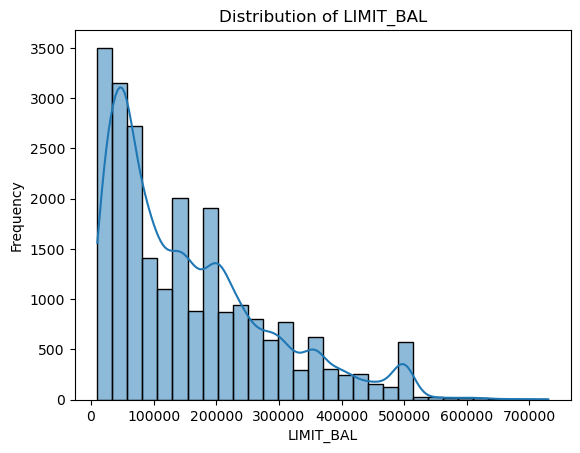

In [88]:
sns.histplot(credit_df.LIMIT_BAL, kde=True, bins=30)
plt.title('Distribution of LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Frequency')
plt.show()

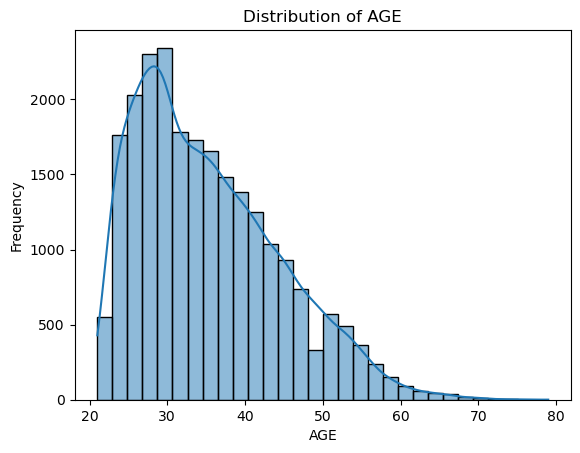

In [89]:
sns.histplot(credit_df.AGE, kde=True, bins=30)
plt.title('Distribution of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

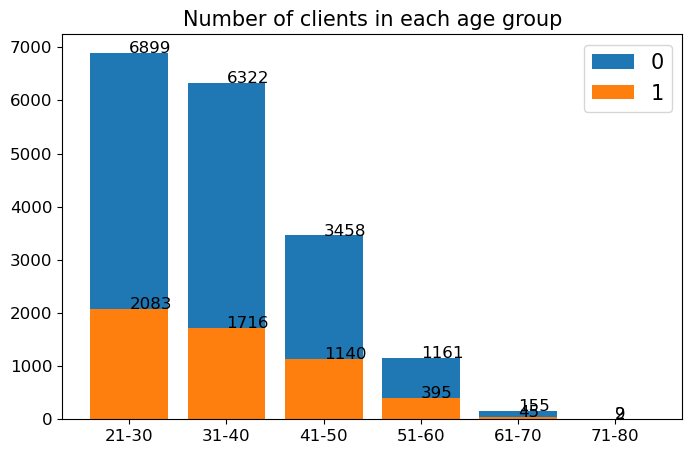

In [90]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
credit_df['AGE_BIN'] = pd.cut(x=credit_df.AGE, bins=bins, labels=names, right=True)

age_cnt = credit_df.AGE_BIN.value_counts()
age_0 = (credit_df.AGE_BIN[credit_df['dpnm'] == 0].value_counts())
age_1 = (credit_df.AGE_BIN[credit_df['dpnm'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

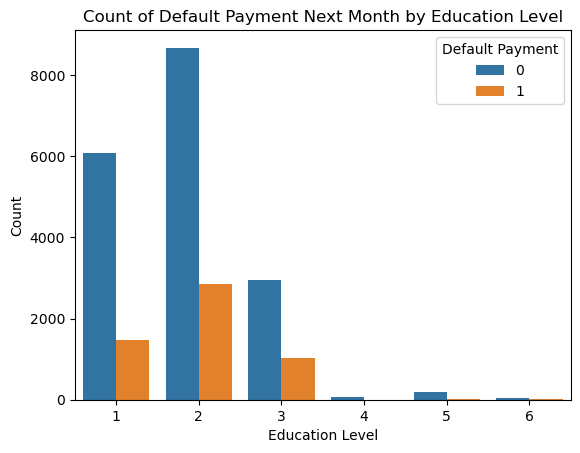

In [91]:
sns.countplot(x="EDUCATION", data=credit_df, hue="dpnm")
plt.title("Count of Default Payment Next Month by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Default Payment", loc="upper right") 
plt.show() 

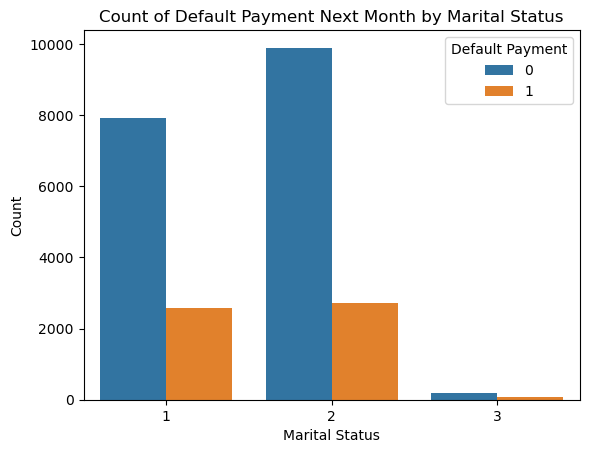

In [92]:
sns.countplot(x="MARRIAGE", data=credit_df, hue="dpnm")
plt.title("Count of Default Payment Next Month by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Default Payment", loc="upper right")
plt.show()

In [93]:
credit_df = pd.get_dummies(credit_df, columns = ["MARRIAGE", "SEX"], drop_first=True, dtype="int")
credit_df.head()


,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm,AGE_BIN,MARRIAGE_2,MARRIAGE_3,SEX_2
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,1000,0,2000,1,21-30,1,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1500,1000,1000,1000,5000,0,31-40,1,0,1
3,50000,2,37,0,0,0,0,0,0,46990,...,2019,1200,1100,1069,1000,0,31-40,0,0,1
4,50000,2,57,-1,0,-1,0,0,0,8617,...,18934,10000,9000,689,679,0,51-60,0,0,0
5,50000,1,37,0,0,0,0,0,0,64400,...,1815,657,1000,1000,800,0,31-40,1,0,0


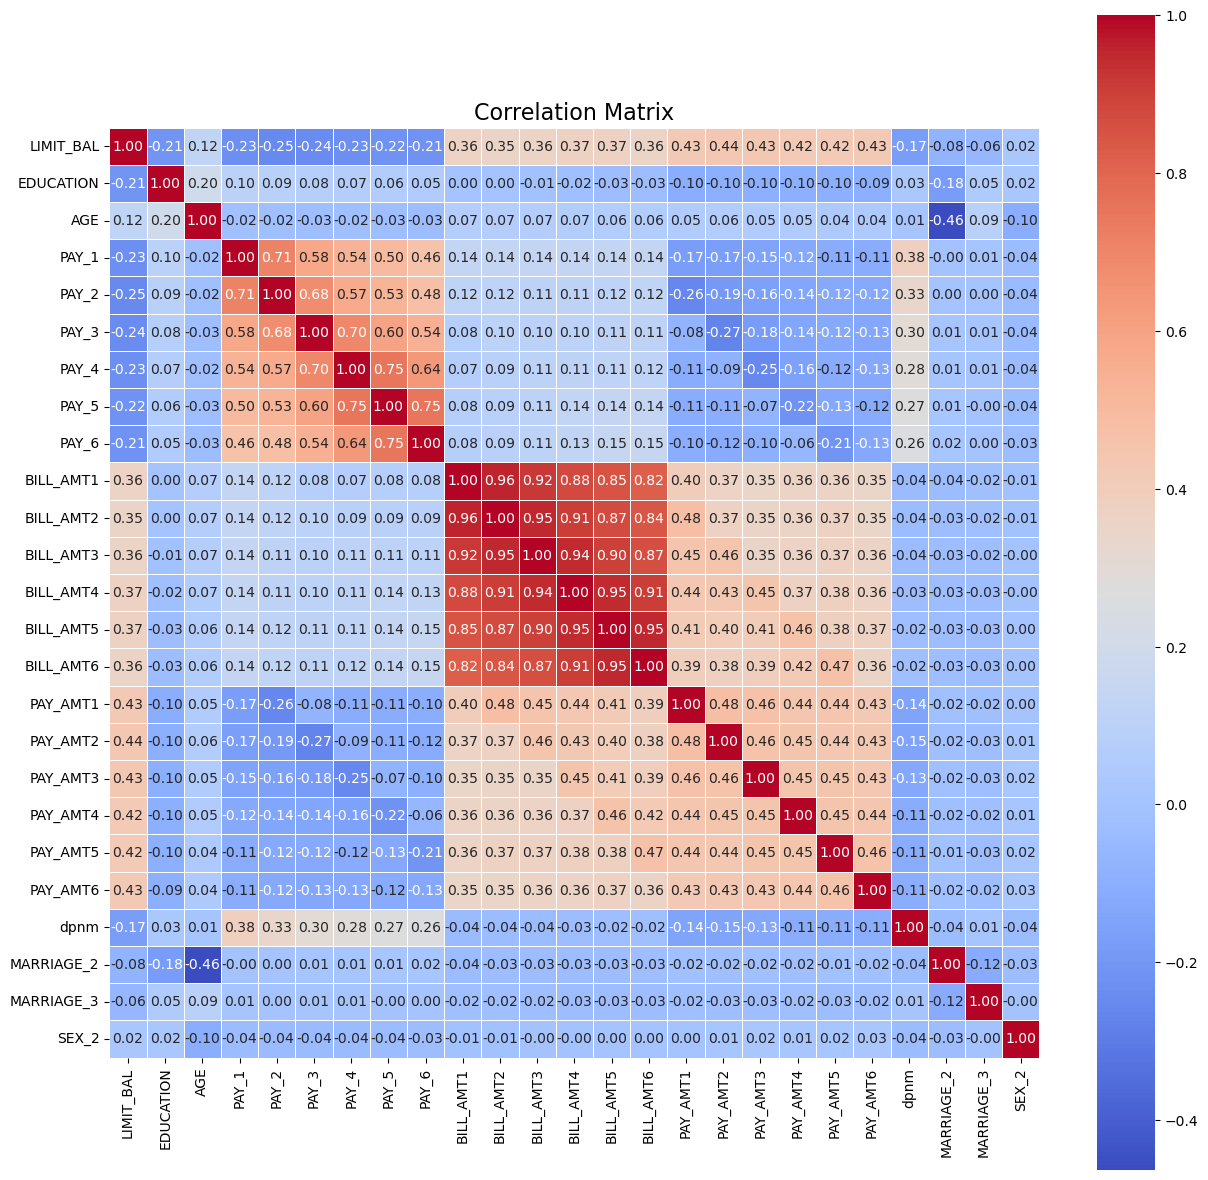

In [94]:
#checking the correlation matrix
correlation_matrix = credit_df.drop(columns=["AGE_BIN"]).corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)           
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA on the fully encoded dataset
pca = PCA()  
pca.fit(credit_df.drop(columns=["dpnm", "AGE_BIN"]))

# Extract feature importance (PCA loadings from the first principal component)
feature_weights = np.abs(pca.components_[0])

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": credit_df.columns.drop(["dpnm", "AGE_BIN"]),
    "Weight": feature_weights
}).sort_values(by="Weight", ascending=False)

# Normalize weights to sum to 1
feature_importance_df["Normalized Weight"] = feature_importance_df["Weight"] / feature_importance_df["Weight"].sum()

feature_importance_df

,Feature,Weight,Normalized Weight
0,LIMIT_BAL,6.762906e-01,2.641604e-01
9,BILL_AMT1,3.326441e-01,1.299314e-01
10,BILL_AMT2,3.231357e-01,1.262174e-01
11,BILL_AMT3,3.123655e-01,1.220106e-01
12,BILL_AMT4,2.918360e-01,1.139917e-01
13,BILL_AMT5,2.734499e-01,1.068101e-01
14,BILL_AMT6,2.621813e-01,1.024085e-01
15,PAY_AMT1,1.669549e-02,6.521290e-03
16,PAY_AMT2,1.619321e-02,6.325097e-03
17,PAY_AMT3,1.468177e-02,5.734725e-03


In [96]:
# Sort features by importance (descending order)
df_feature_importance = feature_importance_df.sort_values(by="Normalized Weight", ascending=False)

# Calculate cumulative variance explained
df_feature_importance["Cumulative Variance"] = df_feature_importance["Normalized Weight"].cumsum()

# Identify the number of features capturing majority variance (e.g., 95% variance)
#selected_features = df_feature_importance[df_feature_importance["Cumulative Variance"] <= 0.95]

# Display the selected features
df_feature_importance

,Feature,Weight,Normalized Weight,Cumulative Variance
0,LIMIT_BAL,6.762906e-01,2.641604e-01,0.264160
9,BILL_AMT1,3.326441e-01,1.299314e-01,0.394092
10,BILL_AMT2,3.231357e-01,1.262174e-01,0.520309
11,BILL_AMT3,3.123655e-01,1.220106e-01,0.642320
12,BILL_AMT4,2.918360e-01,1.139917e-01,0.756312
13,BILL_AMT5,2.734499e-01,1.068101e-01,0.863122
14,BILL_AMT6,2.621813e-01,1.024085e-01,0.965530
15,PAY_AMT1,1.669549e-02,6.521290e-03,0.972051
16,PAY_AMT2,1.619321e-02,6.325097e-03,0.978376
17,PAY_AMT3,1.468177e-02,5.734725e-03,0.984111


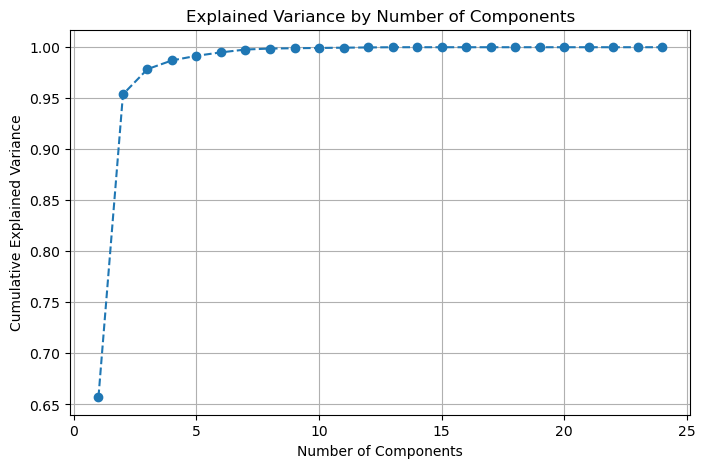

In [97]:
cumulative_variance = pca.explained_variance_ratio_.cumsum() #checking for cumulative variance explained by the features
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [109]:
X = credit_df[["LIMIT_BAL", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]]
y = credit_df["dpnm"]

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [112]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, class_weight='balanced', n_jobs=-1),
    'Naive Bayes': BernoulliNB(alpha=1.0, fit_prior=True),
    'SVM': SVC(kernel='linear', class_weight='balanced', probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1)
}


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.50      0.63      3606
           1       0.31      0.77      0.44      1071

    accuracy                           0.56      4677
   macro avg       0.59      0.63      0.54      4677
weighted avg       0.75      0.56      0.59      4677



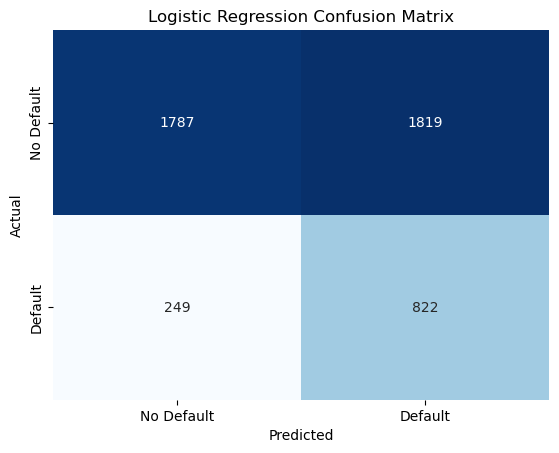

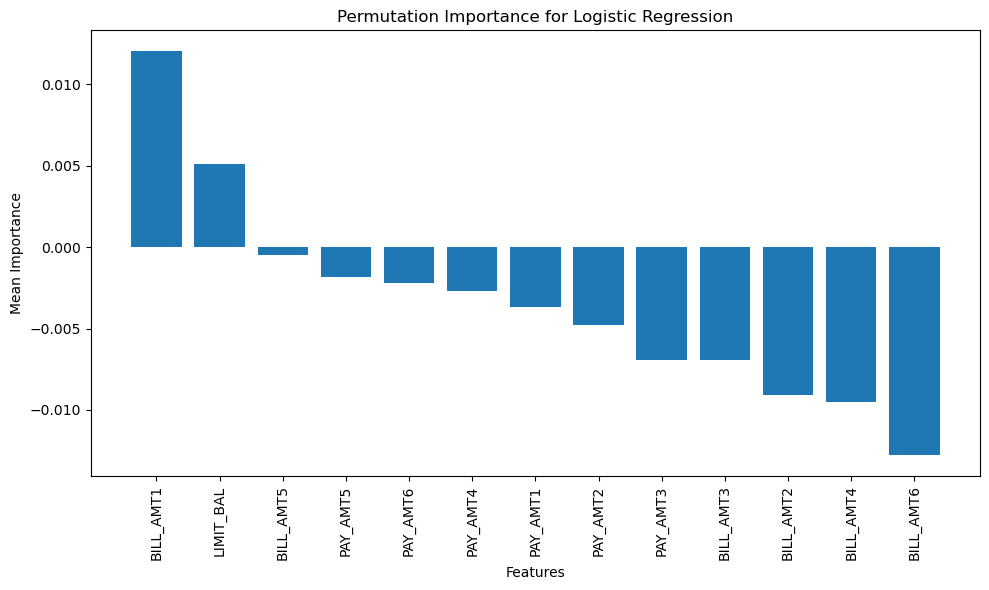


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      3606
           1       0.33      0.40      0.36      1071

    accuracy                           0.68      4677
   macro avg       0.57      0.58      0.57      4677
weighted avg       0.70      0.68      0.69      4677



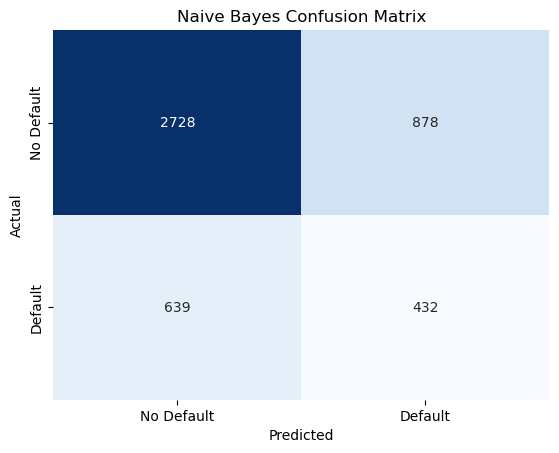

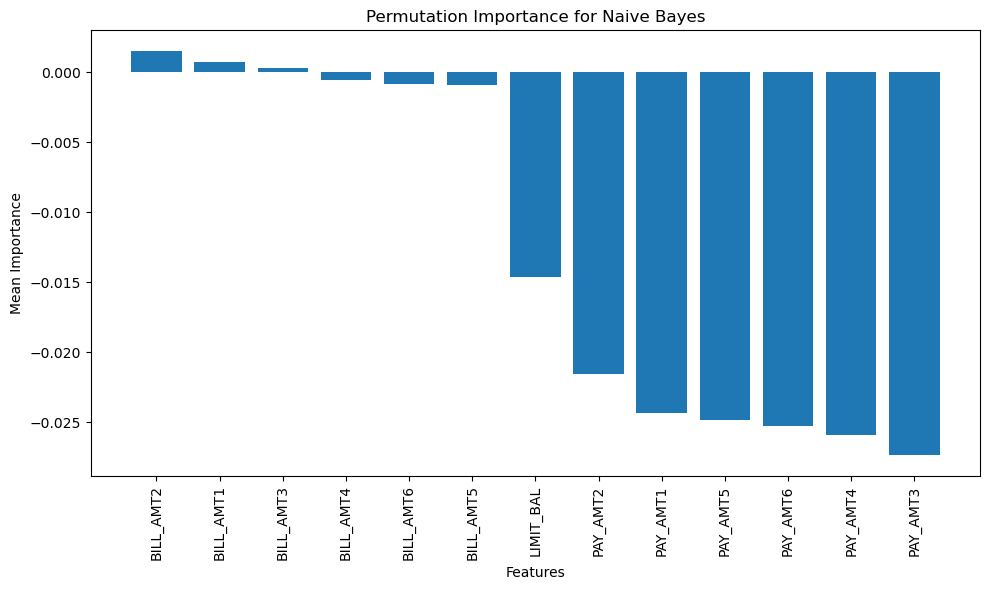


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.41      0.56      3606
           1       0.29      0.81      0.43      1071

    accuracy                           0.51      4677
   macro avg       0.59      0.61      0.50      4677
weighted avg       0.75      0.51      0.53      4677



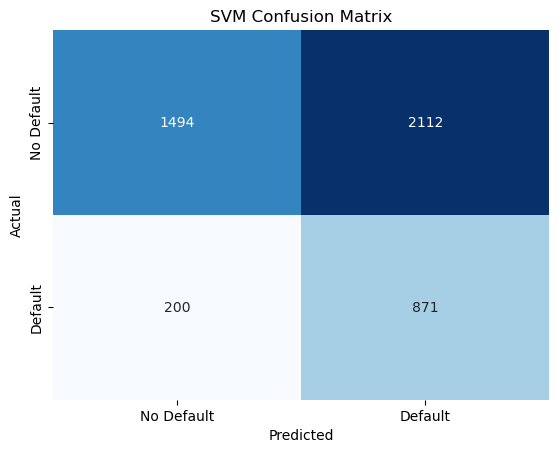

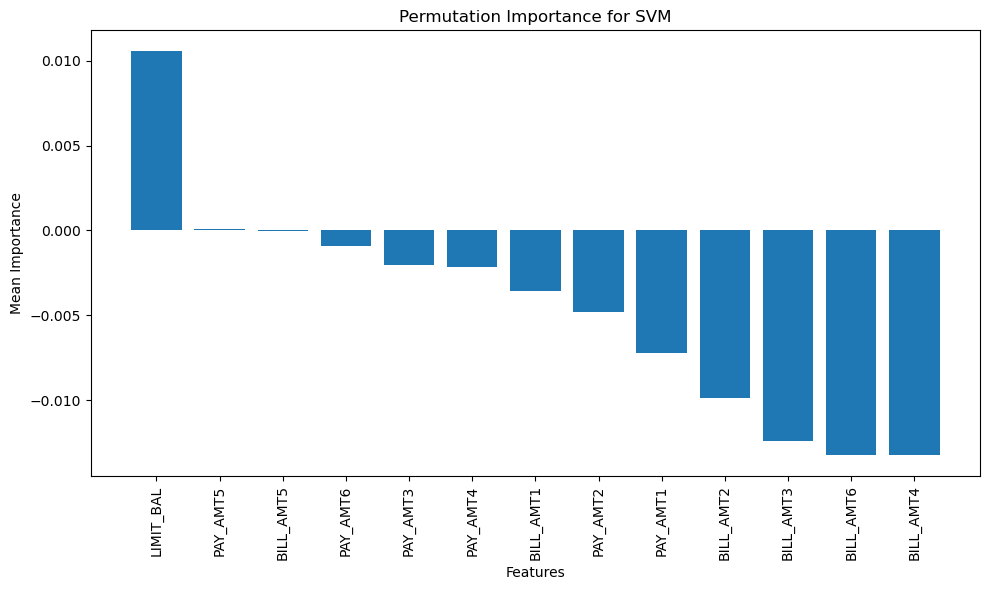


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3606
           1       0.55      0.24      0.33      1071

    accuracy                           0.78      4677
   macro avg       0.68      0.59      0.60      4677
weighted avg       0.75      0.78      0.75      4677



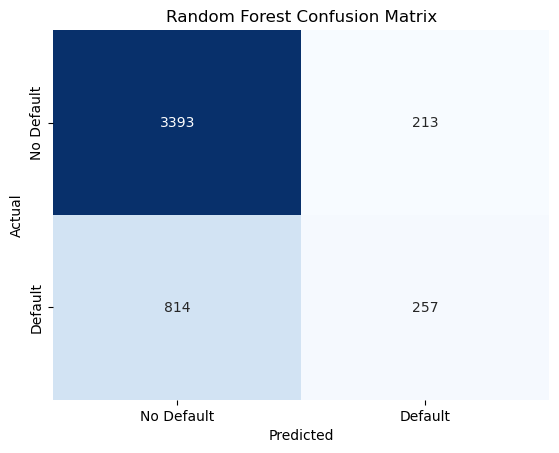

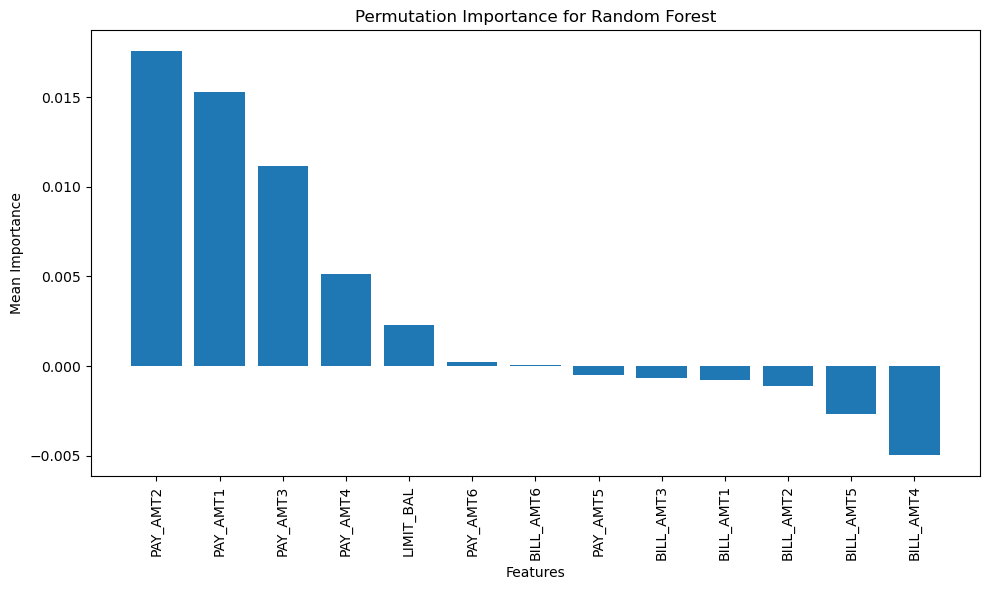


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      3606
           1       0.34      0.38      0.36      1071

    accuracy                           0.69      4677
   macro avg       0.58      0.58      0.58      4677
weighted avg       0.70      0.69      0.70      4677



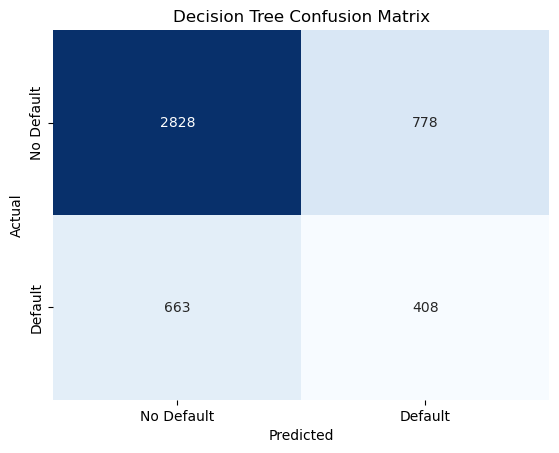

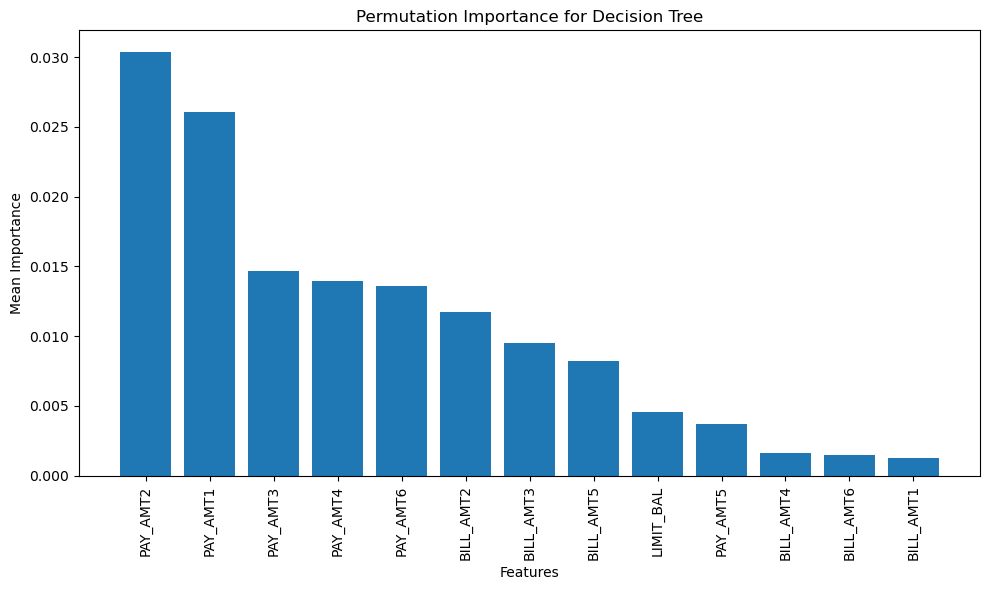


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3606
           1       0.53      0.29      0.38      1071

    accuracy                           0.78      4677
   macro avg       0.67      0.61      0.62      4677
weighted avg       0.75      0.78      0.75      4677



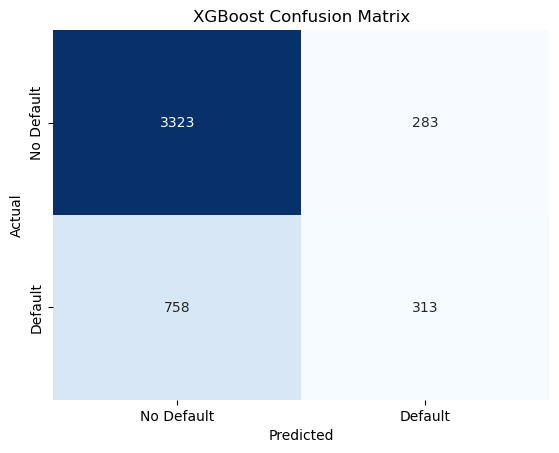

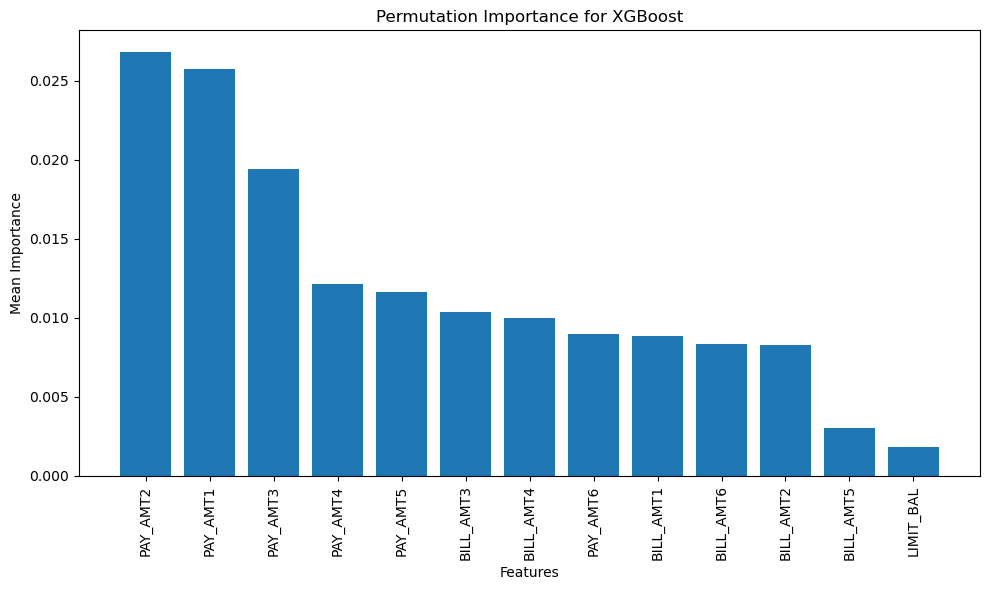

In [116]:
from sklearn.inspection import permutation_importance
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
    sorted_idx = result.importances_mean.argsort()[::-1]
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_idx)), result.importances_mean[sorted_idx], align="center")
    plt.xticks(range(len(sorted_idx)), X.columns[sorted_idx], rotation=90)
    plt.title(f"Permutation Importance for {name}")
    plt.xlabel("Features")
    plt.ylabel("Mean Importance")
    plt.tight_layout()
    plt.show()


In [120]:
# Neural Network using TensorFlow
model_nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation = 'sigmoid')  # Output layer for classification
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50


c:\Users\SOHAM PAL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7578 - loss: 0.5465 - val_accuracy: 0.7667 - val_loss: 0.5125
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7708 - loss: 0.5037 - val_accuracy: 0.7667 - val_loss: 0.4989
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7746 - loss: 0.4936 - val_accuracy: 0.7664 - val_loss: 0.4906
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7749 - loss: 0.4889 - val_accuracy: 0.7683 - val_loss: 0.4834
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7702 - loss: 0.4887 - val_accuracy: 0.7710 - val_loss: 0.4861
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7796 - loss: 0.4759 - val_accuracy: 0.7678 - val_loss: 0.4885
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7793 - loss: 0.4809 - val_accuracy: 0.7766 - val_loss: 0.4802
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7830 - loss: 0.4721 - val_accuracy: 0.7763 - val_

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      3606
           1       0.58      0.20      0.30      1071

    accuracy                           0.78      4677
   macro avg       0.69      0.58      0.59      4677
weighted avg       0.75      0.78      0.74      4677



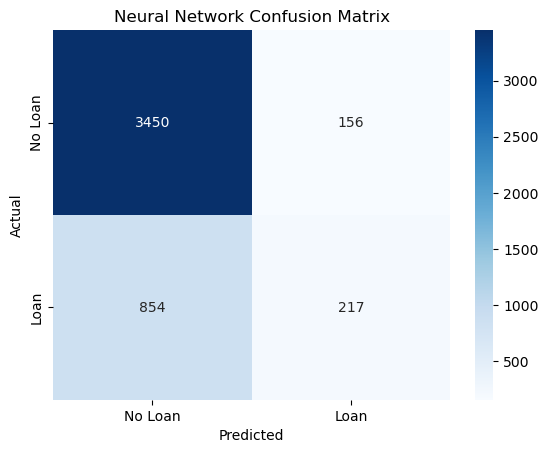

In [121]:
# Evaluate Neural Network
y_proba = model_nn.predict(X_test).flatten()
nn_pred = (y_proba > 0.5).astype(int)  # Convert to binary predictions
print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

# Confusion Matrix for Neural Network
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step
147/147 ━━━

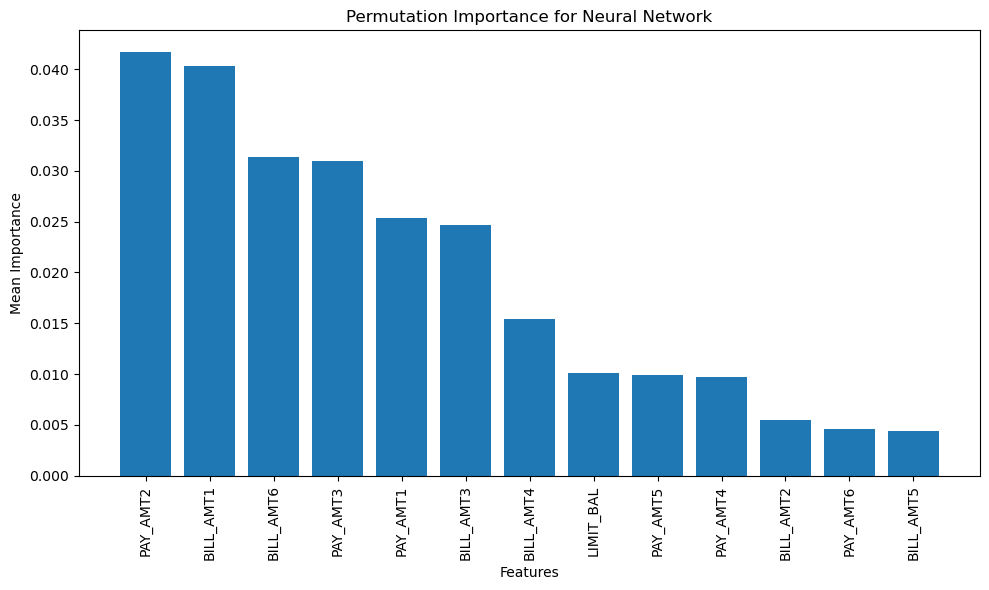

In [ ]:
from sklearn.inspection import permutation_importance

# Custom Wrapper for Keras Model
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = np.array([0, 1])  # Required for sklearn compatibility

    def fit(self, X, y):
        self.model.fit(X, y, epochs=10, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

    def predict_proba(self, X):
        return np.hstack([(1 - self.model.predict(X)), self.model.predict(X)])  # Return probabilities for both classes

# Compute permutation importance for the neural network model
wrapped_nn = KerasWrapper(model_nn)  # Wrap the neural network model for compatibility with sklearn
result_nn = permutation_importance(wrapped_nn, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')

# Sort the features by importance
sorted_idx_nn = result_nn.importances_mean.argsort()[::-1]

# Plot the permutation importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_idx_nn)), result_nn.importances_mean[sorted_idx_nn], align="center")
plt.xticks(range(len(sorted_idx_nn)), X.columns[sorted_idx_nn], rotation=90)
plt.title("Permutation Importance for Neural Network")
plt.xlabel("Features")
plt.ylabel("Mean Importance")
plt.tight_layout()
plt.show()

## Analyzing Classification Reports
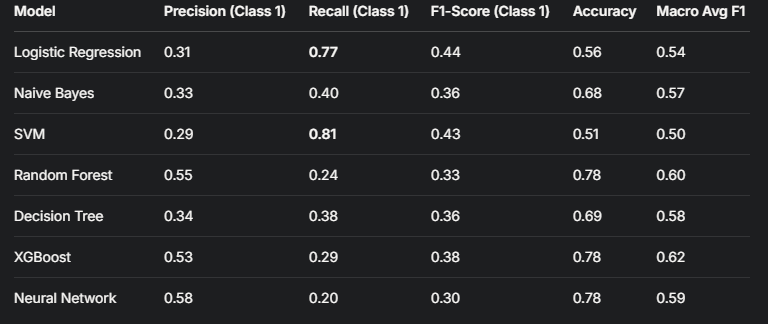

## Observations on Recall for Class 1 (Defaults):
- SVM has the highest recall for class 1 at 0.81, meaning it correctly identifies 81% of defaulters.
- Logistic Regression follows closely with a recall of 0.77.
- Naive Bayes and Decision Tree have moderate recall (0.40 and 0.38, respectively).
- Random Forest, XGBoost, and Neural Network have the lowest recall for class 1 (0.24, 0.29, and 0.20, respectively), meaning they miss a significant number of defaulters.

## Precision and F1-Score for Class 1:
- While recall is our priority, precision matters to avoid too many false positives (predicting non-defaulters as defaulters). Neural Network has the highest precision for class 1 (0.58), followed by Random Forest (0.55) and XGBoost (0.53). However, their recall is very low.
- SVM and Logistic Regression, despite having high recall, have low precision (0.29 and 0.31), meaning they predict many non-defaulters as defaulters.
- The F1-score (harmonic mean of precision and recall) for class 1 is highest for Logistic Regression (0.44), followed by SVM (0.43).

## Overall Accuracy:
- Random Forest, XGBoost, and Neural Network have the highest accuracy (0.78), but this is largely driven by their performance on class 0 (non-defaulters), which has more support (3606 vs. 1071 for class 1).
- SVM has the lowest accuracy (0.51), likely because it prioritizes class 1 recall at the expense of class 0 performance.

## Macro Avg F1-Score:
- The macro avg F1-score gives equal weight to both classes, reflecting overall balance. XGBoost has the highest macro avg F1 (0.62), while SVM has the lowest (0.50).

## Key Takeaway from Classification Reports:
- SVM and Logistic Regression are the best at identifying defaulters (highest recall for class 1), which aligns with the primary goal.
- However, their low precision means they have a higher rate of false positives, which could lead to unnecessary interventions for non-defaulters.
- Models like Random Forest, XGBoost, and Neural Network perform well overall (high accuracy), but they fail to identify many defaulters (low recall for class 1), making them less suitable for this specific goal.

## Analyze Permutation Importance

1. Logistic Regression:
- LIMIT_BAL and BILL_AMT1 have the highest positive importance (around 0.10 and 0.05, respectively).
- Most other features have slightly negative importance, suggesting they may not contribute significantly or could introduce noise.
- This indicates Logistic Regression heavily relies on LIMIT_BAL and BILL_AMT1 for predictions.

2. Naive Bayes:
- All features have negative importance, with BILL_AMT2 having the largest negative impact (around -0.20).
- This suggests that permuting any feature reduces the model’s performance, but the model might be overfitting or sensitive to noise in the data.

3. SVM:
- LIMIT_BAL has a strong positive importance (around 0.10).
- Other features have slightly negative importance, similar to Logistic Regression.
- SVM relies heavily on LIMIT_BAL for its predictions.

4. Random Forest:
- PAY_AMT2, PAY_AMT1, PAY_AMT3, and LIMIT_BAL have the highest positive importance (around 0.15, 0.12, 0.10, and 0.05, respectively).
- Some features like BILL_AMT2 and BILL_AMT4 have negative importance.
- Random Forest considers payment amounts as the most critical features.

5. Decision Tree:
- PAY_AMT2 has the highest importance (around 0.30), followed by PAY_AMT1, PAY_AMT3, and PAY_AMT4.
- Most other features have near-zero or slightly positive importance.
- Decision Tree heavily relies on payment amounts, especially PAY_AMT2.

6. XGBoost:
- PAY_AMT2, PAY_AMT1, and PAY_AMT3 have the highest importance (around 0.25, 0.20, and 0.15, respectively).
- Similar to Random Forest, XGBoost prioritizes payment amounts.

7. Neural Network:
- PAY_AMT2, PAY_AMT1, and BILL_AMT6 have the highest importance (around 0.40, 0.35, and 0.30, respectively).
- Neural Network places a strong emphasis on payment amounts and some bill amounts.

## Key Takeaway from Permutation Importance:
- Payment amounts (PAY_AMT*) are consistently the most important features for tree-based models (Random Forest, Decision Tree, XGBoost) and Neural Network.
- Credit limit (LIMIT_BAL) is critical for Logistic Regression and SVM.
- Bill amounts (BILL_AMT*) have mixed importance, with some models (e.g., Naive Bayes) showing negative importance, suggesting they might not be as predictive or could introduce noise.
- The variation in feature importance across models indicates that different algorithms capture different patterns in the data. For example, Logistic Regression and SVM focus on LIMIT_BAL, while tree-based models and Neural Network focus on PAY_AMT*.

## Final Recommendation:
- SVM is the best model for this specific goal because it has the highest recall for class 1 (0.81), ensuring the fewest defaulters are missed. While its precision is low, leading to more false positives, this is a tolerable trade-off given the priority of catching defaulters.
- Logistic Regression is a close second with a recall of 0.77 and slightly better overall performance (higher accuracy and macro avg F1). It could be a good alternative if a more balanced model is preferred.